In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
df_survey = pd.read_csv('drive/MyDrive/Github/master_thesis/data/rawcontacts_translation.csv', sep=';', thousands='.', decimal=',', encoding='utf-8', index_col=0)
df_survey.replace(to_replace=['dont know', 'dont know/dont want to answer', 'dont want to answer', 'Will not answer'], value=np.nan, inplace=True)
df_survey.head(3)

,gender,age,postnr,region,udsendt,Timings_yyyymmdd,Timings_dateFirstEntry,Timings_dateLastEntry,Timings_dateFinish,Timings_timeTotalMinutes,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3b_1,Q4a_1,Q4a_2,Q4a_3,Q4a_4,Q4b_1,Q4b_2,Q4b_3,Q4b_4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Ny1,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q2020NovNy1,Q2020NovNy2,Q2020NovNy3,Q2020NovNy4,Q2021FebNy1,Q10,Q11,Q12,Q14,Q15,Q16
0,Man,70 +,2830,Capital,20210102,20210103,03-jan-21,03-jan-21,03-jan-21,8.0,NaN,NaN,5.0,7.0,4.0,7.0,4.0,5.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,7,0,0,0,0,0,0,0,0,NaN,5.0,NaN,NaN,1.0,1.0,7.0,5.0,2.0,7.0,7.0,6.0,NaN,6.0,10 times or more,no,no,no,no,no,NaN,no,no,NaN,NaN,Ph.D,1 person,I have no children living at home,Pensioner or early retirement recipient,V: Venstre,C: Conservative Peoples Party
1,Woman,60-69,4654,Zealand,20200717,20200731,31-jul-20,31-jul-20,31-jul-20,8.0,3.0,7.0,7.0,7.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7,0,0,2,2,0,0,2,0,2.0,3.0,2.0,7.0,1.0,NaN,6.0,5.0,NaN,7.0,6.0,2.0,NaN,7.0,have not used face mask,no,no,no,no,no,NaN,NaN,NaN,NaN,NaN,Vocational training,1 person,I have no children living at home,Pensioner or early retirement recipient,V: Venstre,A: Social Democrats
2,Woman,60-69,7451,Central,20210604,20210605,05-jun-21,05-jun-21,05-jun-21,9.0,3.0,7.0,7.0,7.0,7.0,7.0,4.0,3.0,7.0,7.0,5.0,6.0,7.0,7.0,5.0,7,5,0,0,0,3,0,0,0,4.0,7.0,5.0,7.0,7.0,4.0,7.0,5.0,4.0,4.0,7.0,2.0,4.0,7.0,1-3 times,no,no,no,no,no,no,"Yes, I have been tested negative",no,NaN,"I have started the vaccination, ie. received 1...",Short higher education,1 person,I have no children living at home,Pensioner or early retirement recipient,NaN,NaN


In [78]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125301 entries, 0 to 125300
Data columns (total 61 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    125301 non-null  object 
 1   age                       125301 non-null  object 
 2   postnr                    125301 non-null  int64  
 3   region                    125301 non-null  object 
 4   udsendt                   125301 non-null  int64  
 5   Timings_yyyymmdd          125301 non-null  int64  
 6   Timings_dateFirstEntry    125301 non-null  object 
 7   Timings_dateLastEntry     125301 non-null  object 
 8   Timings_dateFinish        125301 non-null  object 
 9   Timings_timeTotalMinutes  125264 non-null  float64
 10  Q1_1                      117577 non-null  float64
 11  Q1_2                      121638 non-null  float64
 12  Q2_1                      124783 non-null  float64
 13  Q2_2                      124378 non-null  f

In [ ]:
df_survey.describe()

# Handle missing data - Part 1

In [70]:
n = df_survey.shape[0]
data = {}
for column in df_survey.columns:
  if column not in ['Ny1', 'Q2020NovNy1', 'Q2020NovNy2','Q2020NovNy3', 'Q2020NovNy4', 'Q2021FebNy1']:
    data[column] = list(df_survey[column][~df_survey[column].isna()].sample(n, replace=True))
df = pd.DataFrame.from_dict(data)
df_survey.update(df, overwrite=False)

# Clean Answers of Open Questions (Question 4)
Q4a) We are interested to hear how many other people have you been physically close to in the past 24 hours. Physically close is here understood to be closer than 2 meters for at least 15 minutes. Please give us your best guess. <br>
<br>
Q4b) We are interested to hear how many other people have you been physically close to in the past 24 hours. Physically close is here understood to be closer than 1 meter for at least 15 minutes. Please give us your best guess.


 Joined columns a and be using max value and values higher than 50 (98 percentil) wehere set to 50



In [109]:
list_open_answered_questions = ['Q4a_1', 'Q4a_2', 'Q4a_3', 'Q4a_4', 'Q4b_1', 'Q4b_2', 'Q4b_3', 'Q4b_4']

for i in range(1,5):
  df_survey[f'Q4_{i}'] = df_survey[[f'Q4a_{i}', f'Q4b_{i}']].apply(lambda x: np.nanmax([x[f'Q4a_{i}'], x[f'Q4b_{i}']]), axis=1)
  df_survey[f'Q4_{i}'][df_survey[f'Q4_{i}']>50] = 50
  for ab in 'ab':
    df_survey.drop(columns=f'Q4{ab}_{i}', inplace=True)
    #df_survey[f'Q4{ab}_{i}'][df_survey[f'Q4{ab}_{i}']>5] = np.nan

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying t

In [ ]:
'''
list_open_answered_questions = ['Q4a_1', 'Q4a_2', 'Q4a_3', 'Q4a_4', 'Q4b_1', 'Q4b_2', 'Q4b_3', 'Q4b_4']
for question in list_open_answered_questions:
  new_name = 'bool_' + question
  df_survey[new_name] = (df_survey[question] > 5).astype(int)

df_survey.describe()
'''

,postnr,udsendt,Timings_yyyymmdd,Timings_timeTotalMinutes,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q4a_1,Q4a_2,Q4a_3,Q4a_4,Q4b_1,Q4b_2,Q4b_3,Q4b_4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,bool_Q4a_1,bool_Q4a_2,bool_Q4a_3,bool_Q4a_4,bool_Q4b_1,bool_Q4b_2,bool_Q4b_3,bool_Q4b_4
count,125301.000000,1.253010e+05,1.253010e+05,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,1.253010e+05,125301.000000,125301.000000,125301.000000,1.253010e+05,125301.000000,125301.00000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000,125301.000000
mean,5632.891469,2.020548e+07,2.020557e+07,458.923792,3.113567,4.798437,5.460427,5.983081,5.425687,6.031468,4.287236,3.468240,6.302966,5.520970,5.156774,6.025874,5.628271,5.479549,5.189504,1.997901,2.438424,3.937894,2.669488e+04,1.400260,1.854446,1.947055,4.894742e+03,4.290349,4.75491,3.548455,5.840672,2.678462,3.256550,5.876649,4.522661,4.426078,5.613810,5.273182,4.220278,5.080981,5.028811,0.074963,0.110366,0.104053,0.156184,0.044445,0.061045,0.061436,0.083918
std,2502.338012,4.830591e+03,4.831117e+03,3410.203171,1.850429,1.795933,1.689064,1.623417,1.696326,1.613582,2.020037,1.931321,1.161317,1.672366,1.690696,1.480191,1.588229,1.744134,1.794532,17.630974,36.379783,294.189943,4.917745e+06,57.255049,154.660335,107.596761,1.115203e+06,1.694444,1.52464,1.681729,1.338225,2.066505,1.856554,1.490993,1.573658,1.680665,1.591122,1.772097,1.950569,1.638063,1.857054,0.263333,0.313347,0.305331,0.363031,0.206082,0.239414,0.240129,0.277266
min,1050.000000,2.020053e+07,2.020053e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.000000,2.020083e+07,2.020090e+07,7.000000,1.000000,4.000000,5.000000,6.000000,4.000000,6.000000,3.000000,2.000000,6.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,3.000000,4.00000,2.000000,5.000000,1.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5500.000000,2.020122e+07,2.020122e+07,9.000000,3.000000,5.000000,6.000000,7.000000,6.000000,7.000000,4.000000,4.000000,7.000000,6.000000,5.000000,7.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,4.000000,5.00000,4.000000,6.000000,2.000000,3.000000,6.000000,5.000000,4.000000,6.000000,6.000000,4.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8200.000000,2.021051e+07,2.021051e+07,13.000000,4.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000,2.000000,2.000000,3.000000e+00,2.000000,1.000000,1.000000,0.000000e+00,5.000000,6.00000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9990.000000,2.021120e+07,2.021120e+07,98773.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000

# Mapping Variables


## Age

Scale:
1. 18-29
2. 30-39
3. 40-49
4. 50-59
5. 60-69
6. 70+

In [ ]:
df_survey['age_num'] = df_survey['age'].replace(to_replace=[ '18-29', '30-39', '40-49', '50-59', '60-69', '70 +'], value=[1, 2, 3, 4, 5, 6])
df_survey['age_num'].unique()

array([6, 5, 4, 1, 3, 2])

## Q3b) Awareness Cough or Sneeze
To what extend were you yesterday aware to cough or sneeze in your sleeve? <br>
Scale: <br>
-  1) Not at all
-  ...
-  7) To a high degree
-  8) Not relevant
-  9)Dont know

In [ ]:
df_survey['Q3b_1'] = df_survey['Q3b_1'].astype(float)
df_survey['Q3b_1'].unique()

array([7., 6., 4., 5., 1., 3., 2.])

## Q7) Signs of illness
In the past week, have you experienced one or more of the following new signs of illness? <br>
Q7_1) Fever <br>
Q7_2) Cough <br>
Q7_3) Sore throat <br>
Q7_4) Disturbance in the smell and taste sense <br>
Q7_5) Shortness of breath <br>
Original Scale: 1) Yes, 2) No, 3) Dont know <br>
New Scale: 0: No, 1: Yes, 2: Dont know


In [ ]:
q7_columns = ['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5']
for column in q7_columns:
  df_survey[column].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)

## Q10) Education
What is your highest completed education? <br>
Scale:


1.   Elementary school
2.   High school
3.   Vocational training
4.   Short higher education
5.   Medium higher education
6.   Bachelor
7.   Long higher education
8.   Ph.D



In [ ]:
df_survey['Q10'].unique()

array(['Ph.D', 'Vocational training', 'Short higher education',
       'Elementary school', 'Long higher education',
       'Medium higher education', 'High school', 'Bachelor'], dtype=object)

In [ ]:
df_survey['Q10'].replace(to_replace=['Elementary school', 'High school', 'Vocational training', 'Short higher education',
                                     'Medium higher education', 'Bachelor', 'Long higher education', 'Ph.D'],
                         value=[1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
df_survey['Q10'].unique()

array([8, 3, 4, 1, 7, 5, 2, 6])

## Q11) Number of members of the household
How many people over the age of 18 live in your household, including yourself? <br>
Scale:


1.   1 person
2.   2 people
3.   3 people
4.   4 people
5.   5 people
6.   6 people or more

In [ ]:
df_survey['Q11'].unique()

array(['1 person', '2 people', '4 people', '3 people', '6 people or more',
       '5 people'], dtype=object)

In [ ]:
df_survey['Q11'].replace(to_replace=['1 person', '2 people', '3 people', '4 people', '5 people', '6 people or more'],
                         value=[1, 2, 3, 4, 5, 6], inplace=True)
df_survey['Q11'].unique()

array([1, 2, 4, 3, 6, 5])

## Q12) Number of children in household
How many home-living children, including children of cohabitant, live with you? <br>
Scale:


1.   1 child
2.   2 children
3.   3 children
4.   4 children
5.   5 children
6.   6 children or more
7.   I have no children living at home

In [ ]:
df_survey['Q12'].unique()

array(['I have no children living at home', '1 child', '2 children',
       '3 children', '5 children', '4 children', '6 children or more'],
      dtype=object)

In [ ]:
df_survey['Q12'].replace(to_replace=['I have no children living at home', '1 child', '2 children', '3 children', '4 children', '5 children', '6 children or more'],
                         value=[0, 1, 2, 3, 4, 5, 6], inplace=True)
df_survey['Q12'].unique()

array([0, 1, 2, 3, 5, 4, 6])

## Q14) Position/Occupation
What is your current occupation? <br>
Scale:
1.   Employee in a private company
2.   Employee in the public sector
3.   Self employed
4.   Student
5.   Unemployed
6.   Pensioner or early retirement recipient
7.   Other

First idea: Transform to boolean 'is_working'

**New Idea: Change to dummy variables**

In [22]:
df_survey['Q14'].unique()

array(['Pensioner or early retirement recipient',
       'Employee in a private company', 'Unemployed',
       'Employee in the public sector (state, municipality or region)',
       'Other', 'Self empoyed', 'Student'], dtype=object)

In [ ]:
#is_working = (df_survey['Q14'] == ('Employee in a private company' or 'Employee in the public sector (state, municipality or region)' or 'Self employed'))
#df_survey['Q14_is_working'] = np.where(is_working, 1, 0)
#df_survey['Q14_is_working'].describe()

count    125301.000000
mean          0.317132
std           0.465361
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Q14_is_working, dtype: float64

In [61]:
def convert_to_boolean(x):
  tup = [False,False,False,False,False,False,False]
  index ={'Pensioner or early retirement recipient':0,
          'Employee in a private company':1,
          'Unemployed':2,
          'Employee in the public sector (state, municipality or region)':3,
          'Self empoyed':4,
          'Student':5,
          'Other':6}
  tup[index[x['Q14']]] = True
  return tup

df_survey[['Q14_ocupation_pensioner',
           'Q14_ocupation_employee_private',
           'Q14_ocupation_unemployed',
           'Q14_ocupation_employee_public',
           'Q14_ocupation_self_employed',
           'Q14_ocupation_student',
           'Q14_ocupation_other']] = df_survey.apply(convert_to_boolean, axis=1, result_type='expand')


KeyError: ignored

In [31]:
df_survey.drop(columns='Q14',inplace=True)

In [32]:
df_survey.head()

,gender,age,postnr,region,udsendt,Timings_yyyymmdd,Timings_dateFirstEntry,Timings_dateLastEntry,Timings_dateFinish,Timings_timeTotalMinutes,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3b_1,Q4a_1,Q4a_2,Q4a_3,Q4a_4,Q4b_1,Q4b_2,Q4b_3,Q4b_4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Ny1,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q2020NovNy1,Q2020NovNy2,Q2020NovNy3,Q2020NovNy4,Q2021FebNy1,Q10,Q11,Q12,Q15,Q16,ocupation_pensioner,ocupation_employee_private,ocupation_unemployed,ocupation_employee_public,ocupation_self_employed,ocupation_student,ocupation_other
0,Man,70 +,2830,Capital,20210102,20210103,03-jan-21,03-jan-21,03-jan-21,8.0,NaN,NaN,5.0,7.0,4.0,7.0,4.0,5.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,7,0,0,0,0,0,0,0,0,NaN,5.0,NaN,NaN,1.0,1.0,7.0,5.0,2.0,7.0,7.0,6.0,NaN,6.0,10 times or more,no,no,no,no,no,NaN,no,no,NaN,NaN,Ph.D,1 person,I have no children living at home,V: Venstre,C: Conservative Peoples Party,True,False,False,False,False,False,False
1,Woman,60-69,4654,Zealand,20200717,20200731,31-jul-20,31-jul-20,31-jul-20,8.0,3.0,7.0,7.0,7.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7,0,0,2,2,0,0,2,0,2.0,3.0,2.0,7.0,1.0,NaN,6.0,5.0,NaN,7.0,6.0,2.0,NaN,7.0,have not used face mask,no,no,no,no,no,NaN,NaN,NaN,NaN,NaN,Vocational training,1 person,I have no children living at home,V: Venstre,A: Social Democrats,True,False,False,False,False,False,False
2,Woman,60-69,7451,Central,20210604,20210605,05-jun-21,05-jun-21,05-jun-21,9.0,3.0,7.0,7.0,7.0,7.0,7.0,4.0,3.0,7.0,7.0,5.0,6.0,7.0,7.0,5.0,7,5,0,0,0,3,0,0,0,4.0,7.0,5.0,7.0,7.0,4.0,7.0,5.0,4.0,4.0,7.0,2.0,4.0,7.0,1-3 times,no,no,no,no,no,no,"Yes, I have been tested negative",no,NaN,"I have started the vaccination, ie. received 1...",Short higher education,1 person,I have no children living at home,NaN,NaN,True,False,False,False,False,False,False
3,Woman,60-69,6740,Southern,20200822,20200826,26-aug-20,26-aug-20,26-aug-20,9.0,2.0,2.0,3.0,3.0,7.0,7.0,1.0,1.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0,NaN,7.0,7.0,7.0,7.0,7.0,1-3 times,no,no,no,no,no,NaN,NaN,NaN,NaN,NaN,Elementary school,1 person,I have no children living at home,NaN,NaN,True,False,False,False,False,False,False
4,Man,60-69,4700,Zealand,20201105,20201106,06-nov-20,06-nov-20,06-nov-20,10.0,6.0,6.0,1.0,7.0,2.0,1.0,7.0,4.0,7.0,3.0,7.0,7.0,7.0,7.0,5.0,7,4,1,4,15,4,1,4,15,2.0,5.0,3.0,7.0,7.0,4.0,7.0,4.0,1.0,1.0,7.0,3.0,7.0,7.0,10 times or more,no,no,no,no,no,NaN,no,no,NaN,NaN,Vocational training,1 person,I have no children living at home,Did not have right to vote,Not eligible to vote,False,True,False,False,False,False,False


## Q15 & Q16) Voting - To Do!

Idea: Transform to (Economic Left - Economic Right) & (Authoritarian & Libertarian) <br>
**(Warning: based on reddit post - we should use some scientific or official sources)**

<br>
New Idea: Select 3 Statements and Rank different Parties based on these Statements <br>
Other Idea: Embedding of Parties

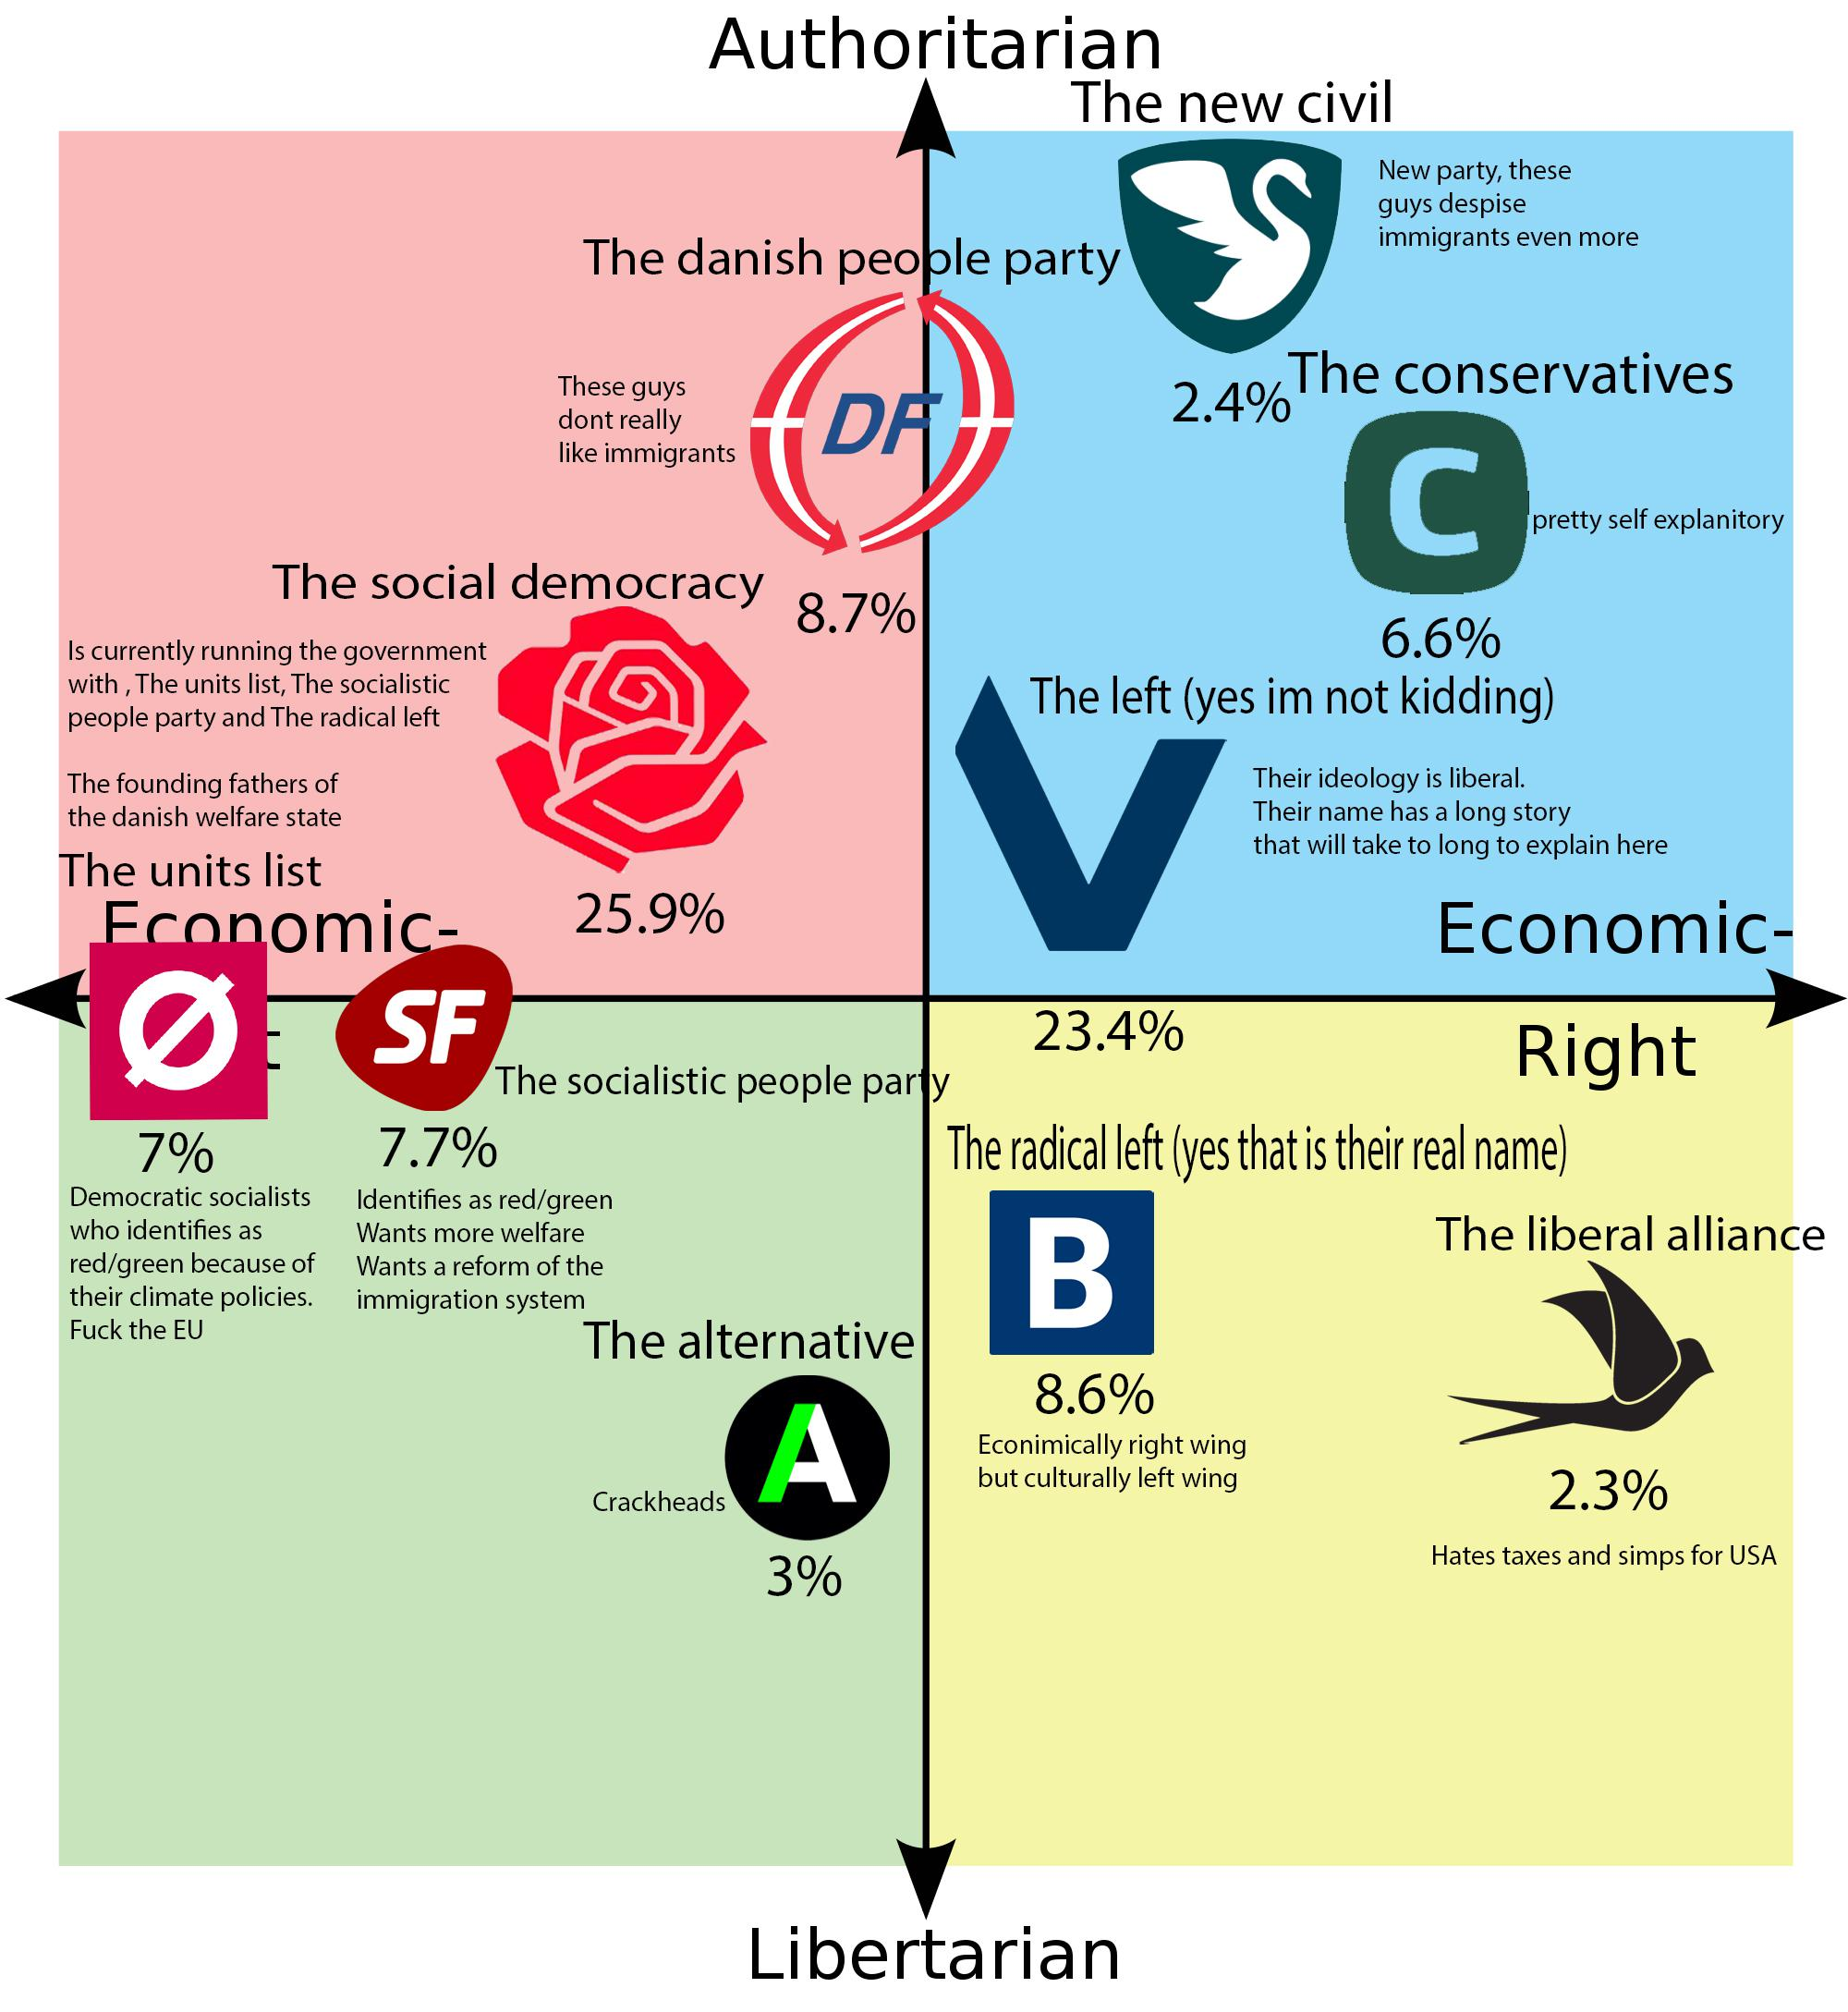

Transform to <br>
economic_spectrum:
1. economic left
2. economic middle left
3. economic middle
4. economic middle right
5. economic right


social_spectrum:
1. social authoritarian
2. social middle authoritarian
3. social middle
4. social middle liberal
5. social liberal


political_compass = {party_name: (economic_spectrum, social_spectrum)}



In [36]:
party_names_english = ['A: Social Democrats', 'B: Danish Social Liberal Party', 'C: Conservative Peoples Party', 'D: The New Right', 'E: Klaus Riskjaer Pedersen', 'F: Socialist Peoples Party',
                      'I: Liberal Alliance', 'K: Christian Demokrats', 'O: Danish Peoples Party', 'P: Hard Line', 'V: Venstre', 'OE: Red-Green Alliance', 'Ao: The Alternative']
political_compass = {'A: Social Democrats': (2, 4), 'B: Danish Social Liberal Party': (4, 2),
                     'C: Conservative Peoples Party': (4, 2), 'D: The New Right': (4, 2),
                     'E: Klaus Riskjaer Pedersen': (4, 3), 'F: Socialist Peoples Party': (2, 3),
                     'I: Liberal Alliance': (5, 4), 'K: Christian Demokrats': (4, 2),
                     'O: Danish Peoples Party': (3, 2), 'P: Hard Line': (5, 1),
                     'V: Venstre': (2, 4), 'OE: Red-Green Alliance': (1, 3),
                     'Ao: The Alternative': (2, 5)}

In [37]:
def map_political_compass(x):
  try: 
    return_val = political_compass[x]
  except:
    return_val = (np.nan, np.nan)
  return return_val

### Q15) Voting at last election
What party did you vote for at the last general election? (5. juni 2019)

1.   A: Social Democrats
2.   B: Danish Social Liberal Party
3.   C: Conservative Peoples Party
4.   D: The New Right
5.   E: Klaus Riskjaer Pedersen
6.   F: Socialist Peoples Party
7.   I: Liberal Alliance
8.   K: Christian Demokrats
9.   O: Danish Peoples Party
10.  P: Hard Line
11.  V: Venstre
12.  OE: Red-Green Alliance
13.  Ao: The Alternative
14.  Other parties/candidate outside parties
15.  Voted blank
16.  Did not vote
17.  Did not have right to vote
18.  Will not answer - change to nan


In [33]:
df_survey['Q15'].unique()

array(['V: Venstre', nan, 'Did not have right to vote',
       'O: Danish Peoples Party', 'A: Social Democrats',
       'C: Conservative Peoples Party', 'OE: Red-Green Alliance',
       'F: Socialist Peoples Party', 'B: Danish Social Liberal Party',
       'Did not vote', 'Voted blank', 'I: Liberal Alliance',
       'K: Christian Demokrats', 'Ao: The Alternative',
       'D: The New Right', 'E: Klaus Riskjaer Pedersen', 'P: Hard Line',
       'Other parties/candidate outside parties'], dtype=object)

In [38]:
df_survey['Q15_economic_spectrum'] = df_survey['Q15'].apply(lambda x: map_political_compass(x)[0])
df_survey['Q15_social_spectrum'] = df_survey['Q15'].apply(lambda x: map_political_compass(x)[1])
df_survey.head(3)

,gender,age,postnr,region,udsendt,Timings_yyyymmdd,Timings_dateFirstEntry,Timings_dateLastEntry,Timings_dateFinish,Timings_timeTotalMinutes,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3b_1,Q4a_1,Q4a_2,Q4a_3,Q4a_4,Q4b_1,Q4b_2,Q4b_3,Q4b_4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Ny1,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q2020NovNy1,Q2020NovNy2,Q2020NovNy3,Q2020NovNy4,Q2021FebNy1,Q10,Q11,Q12,Q15,Q16,ocupation_pensioner,ocupation_employee_private,ocupation_unemployed,ocupation_employee_public,ocupation_self_employed,ocupation_student,ocupation_other,Q15_economic_spectrum,Q15_social_spectrum
0,Man,70 +,2830,Capital,20210102,20210103,03-jan-21,03-jan-21,03-jan-21,8.0,NaN,NaN,5.0,7.0,4.0,7.0,4.0,5.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,7,0,0,0,0,0,0,0,0,NaN,5.0,NaN,NaN,1.0,1.0,7.0,5.0,2.0,7.0,7.0,6.0,NaN,6.0,10 times or more,no,no,no,no,no,NaN,no,no,NaN,NaN,Ph.D,1 person,I have no children living at home,V: Venstre,C: Conservative Peoples Party,True,False,False,False,False,False,False,2.0,4.0
1,Woman,60-69,4654,Zealand,20200717,20200731,31-jul-20,31-jul-20,31-jul-20,8.0,3.0,7.0,7.0,7.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7,0,0,2,2,0,0,2,0,2.0,3.0,2.0,7.0,1.0,NaN,6.0,5.0,NaN,7.0,6.0,2.0,NaN,7.0,have not used face mask,no,no,no,no,no,NaN,NaN,NaN,NaN,NaN,Vocational training,1 person,I have no children living at home,V: Venstre,A: Social Democrats,True,False,False,False,False,False,False,2.0,4.0
2,Woman,60-69,7451,Central,20210604,20210605,05-jun-21,05-jun-21,05-jun-21,9.0,3.0,7.0,7.0,7.0,7.0,7.0,4.0,3.0,7.0,7.0,5.0,6.0,7.0,7.0,5.0,7,5,0,0,0,3,0,0,0,4.0,7.0,5.0,7.0,7.0,4.0,7.0,5.0,4.0,4.0,7.0,2.0,4.0,7.0,1-3 times,no,no,no,no,no,no,"Yes, I have been tested negative",no,NaN,"I have started the vaccination, ie. received 1...",Short higher education,1 person,I have no children living at home,NaN,NaN,True,False,False,False,False,False,False,NaN,NaN


### Q16) Voting if election tomorrow
Which party would you vote for, if there was general election tomorrow? <br>


In [39]:
df_survey['Q16'].unique()

array(['C: Conservative Peoples Party', 'A: Social Democrats', nan,
       'Not eligible to vote', 'Unsure of party choice',
       'O: Danish Peoples Party', 'OE: Red-Green Alliance', 'V: Venstre',
       'F: Socialist Peoples Party', 'D: The New Right', 'Would not vote',
       'B: Danish Social Liberal Party', 'I: Liberal Alliance',
       'K: Christian Demokrats', 'Ao: The Alternative',
       'Other parties/candidate outside parties', 'Would vote blank',
       'E: Klaus Riskjaer Pedersen', 'P: Hard Line'], dtype=object)

In [40]:
df_survey['Q16_economic_spectrum'] = df_survey['Q16'].apply(lambda x: map_political_compass(x)[0])
df_survey['Q16_social_spectrum'] = df_survey['Q16'].apply(lambda x: map_political_compass(x)[1])
df_survey.head(3)

,gender,age,postnr,region,udsendt,Timings_yyyymmdd,Timings_dateFirstEntry,Timings_dateLastEntry,Timings_dateFinish,Timings_timeTotalMinutes,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3b_1,Q4a_1,Q4a_2,Q4a_3,Q4a_4,Q4b_1,Q4b_2,Q4b_3,Q4b_4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Ny1,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q2020NovNy1,Q2020NovNy2,Q2020NovNy3,Q2020NovNy4,Q2021FebNy1,Q10,Q11,Q12,Q15,Q16,ocupation_pensioner,ocupation_employee_private,ocupation_unemployed,ocupation_employee_public,ocupation_self_employed,ocupation_student,ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum
0,Man,70 +,2830,Capital,20210102,20210103,03-jan-21,03-jan-21,03-jan-21,8.0,NaN,NaN,5.0,7.0,4.0,7.0,4.0,5.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,7,0,0,0,0,0,0,0,0,NaN,5.0,NaN,NaN,1.0,1.0,7.0,5.0,2.0,7.0,7.0,6.0,NaN,6.0,10 times or more,no,no,no,no,no,NaN,no,no,NaN,NaN,Ph.D,1 person,I have no children living at home,V: Venstre,C: Conservative Peoples Party,True,False,False,False,False,False,False,2.0,4.0,4.0,2.0
1,Woman,60-69,4654,Zealand,20200717,20200731,31-jul-20,31-jul-20,31-jul-20,8.0,3.0,7.0,7.0,7.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7,0,0,2,2,0,0,2,0,2.0,3.0,2.0,7.0,1.0,NaN,6.0,5.0,NaN,7.0,6.0,2.0,NaN,7.0,have not used face mask,no,no,no,no,no,NaN,NaN,NaN,NaN,NaN,Vocational training,1 person,I have no children living at home,V: Venstre,A: Social Democrats,True,False,False,False,False,False,False,2.0,4.0,2.0,4.0
2,Woman,60-69,7451,Central,20210604,20210605,05-jun-21,05-jun-21,05-jun-21,9.0,3.0,7.0,7.0,7.0,7.0,7.0,4.0,3.0,7.0,7.0,5.0,6.0,7.0,7.0,5.0,7,5,0,0,0,3,0,0,0,4.0,7.0,5.0,7.0,7.0,4.0,7.0,5.0,4.0,4.0,7.0,2.0,4.0,7.0,1-3 times,no,no,no,no,no,no,"Yes, I have been tested negative",no,NaN,"I have started the vaccination, ie. received 1...",Short higher education,1 person,I have no children living at home,NaN,NaN,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN


### Idea: Add Change in voting behavior as variable
**TO DO: Prüfen und Überarbeiten**

In [41]:
df_survey['change_voting_economic'] = df_survey['Q15_economic_spectrum'] - df_survey['Q16_economic_spectrum'] 
df_survey['change_voting_social'] = df_survey['Q15_social_spectrum'] - df_survey['Q16_social_spectrum'] 
df_survey.describe()

,postnr,udsendt,Timings_yyyymmdd,Timings_timeTotalMinutes,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q4a_1,Q4a_2,Q4a_3,Q4a_4,Q4b_1,Q4b_2,Q4b_3,Q4b_4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum,change_voting_economic,change_voting_social
count,125301.000000,1.253010e+05,1.253010e+05,125264.000000,117577.000000,121638.000000,124783.000000,124378.000000,123400.000000,124479.000000,123354.000000,123558.000000,125085.000000,124643.000000,124117.000000,122568.000000,124847.000000,124240.000000,124262.000000,125301.000000,125301.000000,125301.000000,1.253010e+05,125301.000000,125301.000000,125301.000000,1.253010e+05,114120.000000,112799.000000,111231.000000,122415.000000,119862.000000,116194.000000,123947.000000,122408.000000,110419.000000,122651.000000,123388.000000,124372.000000,115303.000000,122283.000000,95149.000000,95149.000000,78028.000000,78028.000000,73606.000000,73606.000000
mean,5632.891469,2.020548e+07,2.020557e+07,458.988624,3.112386,4.797497,5.461225,5.983076,5.425924,6.031226,4.287376,3.468646,6.302970,5.521168,5.157045,6.025194,5.627848,5.480626,5.189060,1.997901,2.438424,3.937894,2.669488e+04,1.400260,1.854446,1.947055,4.894742e+03,4.289108,4.754643,3.550323,5.840060,2.678313,3.257664,5.876294,4.522147,4.423659,5.613913,5.272757,4.220090,5.081854,5.027436,2.454340,3.367760,2.542293,3.254562,-0.105684,0.119026
std,2502.338012,4.830591e+03,4.831117e+03,3410.661382,1.851574,1.795780,1.688539,1.623372,1.696053,1.613938,2.020338,1.931238,1.161296,1.672263,1.690708,1.480643,1.588266,1.743575,1.794972,17.630974,36.379783,294.189943,4.917745e+06,57.255049,154.660335,107.596761,1.115203e+06,1.692749,1.523039,1.679959,1.338972,2.066434,1.856363,1.491222,1.574123,1.681356,1.591081,1.772307,1.950618,1.637140,1.857981,0.974098,0.893245,1.039220,0.893517,0.791220,0.774432
min,1050.000000,2.020053e+07,2.020053e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-4.000000,-4.000000
25%,3000.000000,2.020083e+07,2.020090e+07,7.000000,1.000000,3.000000,5.000000,6.000000,4.000000,6.000000,3.000000,2.000000,6.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,3.000000,4.000000,2.000000,5.000000,1.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000
50%,5500.000000,2.020122e+07,2.020122e+07,9.000000,3.000000,5.000000,6.000000,7.000000,6.000000,7.000000,4.000000,4.000000,7.000000,6.000000,5.000000,7.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,4.000000,5.000000,4.000000,6.000000,2.000000,3.000000,6.000000,5.000000,4.000000,6.000000,6.000000,4.000000,5.000000,5.000000,2.000000,4.000000,2.000000,4.000000,0.000000,0.000000
75%,8200.000000,2.021051e+07,2.021051e+07,13.000000,4.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000,2.000000,2.000000,3.000000e+00,2.000000,1.000000,1.000000,0.000000e+00,5.000000,6.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,3.000000,4.000000,4.000000,4.000000,0.000000,0.000000
max,9990.000000,2.021120e+07,2.021120e+07,98773.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3105.000000,9999.000000,100000.000000,1.000000e+09,20100.000000,54510.000000,36542

## New Questions - To Do: Get complete questions
Ny1 Q2020NovNy1 Q2020NovNy2 Q2020NovNy3 Q2020NovNy4 Q2021FebNy1

### Ny1 - Wearing Face Masks

Scale:
0. have not used face mask
1. 1-3 times
2. 4-6 times
3. 7-9 times
4. 10 times or more

In [ ]:
df_survey['Ny1'].unique()

array(['10 times or more', 'have not used face mask', '1-3 times',
       '7-9 times', '4-6 times', nan], dtype=object)

In [42]:
df_survey['Ny1'].replace(to_replace=['have not used face mask', '1-3 times', '4-6 times', '7-9 times', '10 times or more'],
                         value=[0, 1, 2, 3, 4], inplace=True)
df_survey['Ny1'].unique()

array([ 4.,  0.,  1.,  3.,  2., nan])

### Q2020NovNy1 - To Do

In [ ]:
df_survey['Q2020NovNy1'].unique()

array([nan, 'no', 'yes'], dtype=object)

### Q2020NovNy2 - Testing

In [ ]:
df_survey['Q2020NovNy2'].unique()

array(['no', nan, 'Yes, I have been tested negative',
       'Yes, but I do not yet know the answer',
       'Yes, I have been tested positive'], dtype=object)

### Q2020NovNy3 - To Do

In [43]:
df_survey['Q2020NovNy3'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df_survey['Q2020NovNy3'].unique()

array([ 0., nan,  1.])

### Q2020NovNy4 - To Do

In [ ]:
df_survey['Q2020NovNy4'].unique()

array([nan, 'To a high degree', 'Somewhat', 'To a lesser degree',
       'Not at all'], dtype=object)

### Q2021FebNy1 - Vaccination - To Do: Discuss Mapping
Idea: Split into Vaccination Status (not vaccinated (0), partly vaccinated (1), fully vaccinated (2)) & Willingness to be vaccinated (yes, no) <br>

vaccination_mapping = {'Description': (Vaccination_status, Willingness to be vaccinated)}

In [49]:
df_survey['Q2021FebNy1'].unique()

array([nan,
       'I have started the vaccination, ie. received 1 of 2 vaccine doses',
       'I have been vaccinated and have received all the necessary doses',
       'I have not yet been offered vaccination but would like to be vaccinated',
       'I have been offered vaccination but have not yet received the 1st dose',
       'I have been offered vaccination but have chosen not to accept it',
       'I have not yet been offered vaccination, and do not want to be vaccinated'],
      dtype=object)

In [44]:
vaccination_mapping = {'I have started the vaccination, ie. received 1 of 2 vaccine doses': (1, 1),
                       'I have been vaccinated and have received all the necessary doses': (2, 1),
                       'I have not yet been offered vaccination but would like to be vaccinated': (0, 1),
                       'I have been offered vaccination but have not yet received the 1st dose': (0, 1),
                       'I have been offered vaccination but have chosen not to accept it': (0, 0),
                       'I have not yet been offered vaccination, and do not want to be vaccinated': (0, 0)}

In [54]:
def map_vaccination(x):
  if x is np.nan:
    return (np.nan, np.nan)
  else:
    return vaccination_mapping[x]
  

In [55]:
df_survey['Vaccination_Status'] = df_survey['Q2021FebNy1'].apply(lambda x: map_vaccination(x)[0])
df_survey['Willingness_Vaccination'] = df_survey['Q2021FebNy1'].apply(lambda x: map_vaccination(x)[1])
df_survey.head(3)

,gender,age,postnr,region,udsendt,Timings_yyyymmdd,Timings_dateFirstEntry,Timings_dateLastEntry,Timings_dateFinish,Timings_timeTotalMinutes,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3b_1,Q4a_1,Q4a_2,Q4a_3,Q4a_4,Q4b_1,Q4b_2,Q4b_3,Q4b_4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Ny1,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q2020NovNy1,Q2020NovNy2,Q2020NovNy3,Q2020NovNy4,Q2021FebNy1,Q10,Q11,Q12,Q15,Q16,ocupation_pensioner,ocupation_employee_private,ocupation_unemployed,ocupation_employee_public,ocupation_self_employed,ocupation_student,ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum,change_voting_economic,change_voting_social,Vaccination_Status,Willingness_Vaccination
0,Man,70 +,2830,Capital,20210102,20210103,03-jan-21,03-jan-21,03-jan-21,8.0,NaN,NaN,5.0,7.0,4.0,7.0,4.0,5.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,7,0,0,0,0,0,0,0,0,NaN,5.0,NaN,NaN,1.0,1.0,7.0,5.0,2.0,7.0,7.0,6.0,NaN,6.0,4.0,no,no,no,no,no,NaN,no,0.0,NaN,NaN,Ph.D,1 person,I have no children living at home,V: Venstre,C: Conservative Peoples Party,True,False,False,False,False,False,False,2.0,4.0,4.0,2.0,-2.0,2.0,NaN,NaN
1,Woman,60-69,4654,Zealand,20200717,20200731,31-jul-20,31-jul-20,31-jul-20,8.0,3.0,7.0,7.0,7.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7,0,0,2,2,0,0,2,0,2.0,3.0,2.0,7.0,1.0,NaN,6.0,5.0,NaN,7.0,6.0,2.0,NaN,7.0,0.0,no,no,no,no,no,NaN,NaN,NaN,NaN,NaN,Vocational training,1 person,I have no children living at home,V: Venstre,A: Social Democrats,True,False,False,False,False,False,False,2.0,4.0,2.0,4.0,0.0,0.0,NaN,NaN
2,Woman,60-69,7451,Central,20210604,20210605,05-jun-21,05-jun-21,05-jun-21,9.0,3.0,7.0,7.0,7.0,7.0,7.0,4.0,3.0,7.0,7.0,5.0,6.0,7.0,7.0,5.0,7,5,0,0,0,3,0,0,0,4.0,7.0,5.0,7.0,7.0,4.0,7.0,5.0,4.0,4.0,7.0,2.0,4.0,7.0,1.0,no,no,no,no,no,no,"Yes, I have been tested negative",0.0,NaN,"I have started the vaccination, ie. received 1...",Short higher education,1 person,I have no children living at home,NaN,NaN,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


# Handle missing data - Part 2

In [58]:
for column in df_survey.columns:
  if df_survey[column].isnull().sum() > 0:
    print(str(column) + ': ' + str(df_survey[column].isnull().sum() / df_survey.shape[0] * 100) + ' %')

Timings_timeTotalMinutes: 0.02952889442223127 %
Q1_1_feel_exposed: 6.164356230197684 %
Q1_2_covid_is_threat: 2.9233605478008955 %
Q2_1_easy_to_follow_advice: 0.4134045219112378 %
Q2_2_can_follow_advice_if_wanted: 0.7366262041005259 %
Q2_3_if_follow_advice_safe: 1.5171467107205847 %
Q2_4_if_follow_advice_others_safe: 0.6560203031101108 %
Q2_5_follow_advice_relationships_impared: 1.553858309191467 %
Q2_6_follow_advice_life_degraded: 1.391050350755381 %
Q3_1_aware_hand_hygiene: 0.17238489716762037 %
Q3_2_avoid_contact: 0.5251354737791398 %
Q3_3_ensure_frequent_cleaning: 0.9449246215114007 %
Q3_4_avoid_risk_groups: 2.1811477961069743 %
Q3_5_keep_distance: 0.3623275153430539 %
Q3_6_avoid_crowds: 0.8467609995131723 %
Q3_7_minimize_activities_w_contact: 0.8292032785053591 %
Q3b_1_sneeze_sleeve: 5.299239431449071 %
Q5_1_others_took_distance: 8.923312663107238 %
Q5_2_others_follow_advice: 9.977574001803657 %
Q5_3_others_not_care_spreading: 11.22896066272416 %
Q5_4_yourself_kept_distance: 2.3032

# Rename Columns

In [57]:
columns={'Ny1': 'Ny1_nr_times_wearing_masks_last_week',
 'Q10': 'Q10_education',
 'Q11': 'Q11_nr_members_household',
 'Q12': 'Q12_nr_children_household',
 'Q14': 'Q14_occupation',
 'Q15': 'Q15_vote_last_election',
 'Q16': 'Q16_vote_tomorrow',
 'Q1_1': 'Q1_1_feel_exposed',
 'Q1_2': 'Q1_2_covid_is_threat',
 'Q2020NovNy1': 'Q2020NovNy1',
 'Q2020NovNy2': 'Q2020NovNy2',
 'Q2020NovNy3': 'Q2020NovNy3',
 'Q2020NovNy4': 'Q2020NovNy4',
 'Q2021FebNy1': 'Q2021FebNy1_vaccinations',
 'Q2_1': 'Q2_1_easy_to_follow_advice',
 'Q2_2': 'Q2_2_can_follow_advice_if_wanted',
 'Q2_3': 'Q2_3_if_follow_advice_safe',
 'Q2_4': 'Q2_4_if_follow_advice_others_safe',
 'Q2_5': 'Q2_5_follow_advice_relationships_impared',
 'Q2_6': 'Q2_6_follow_advice_life_degraded',
 'Q3_1': 'Q3_1_aware_hand_hygiene',
 'Q3_2': 'Q3_2_avoid_contact',
 'Q3_3': 'Q3_3_ensure_frequent_cleaning',
 'Q3_4': 'Q3_4_avoid_risk_groups',
 'Q3_5': 'Q3_5_keep_distance',
 'Q3_6': 'Q3_6_avoid_crowds',
 'Q3_7': 'Q3_7_minimize_activities_w_contact',
 'Q3b_1': 'Q3b_1_sneeze_sleeve',
 'Q4a_1': 'Q4a_1_nr_contact_nonhouse_family_2m',
 'Q4a_2': 'Q4a_2_nr_conact_collegues_2m',
 'Q4a_3': 'Q4a_3_nr_contact_friends_2m',
 'Q4a_4': 'Q4a_4_nr_contact_strangers_2m',
 'Q4b_1': 'Q4b_1_nr_contact_nonhouse_family_1m',
 'Q4b_2': 'Q4b_2_nr_conact_collegues_1m',
 'Q4b_3': 'Q4b_3_nr_contact_friends_1m',
 'Q4b_4': 'Q4b_4_nr_contact_strangers_1m',
 'Q5_1': 'Q5_1_others_took_distance',
 'Q5_2': 'Q5_2_others_follow_advice',
 'Q5_3': 'Q5_3_others_not_care_spreading',
 'Q5_4': 'Q5_4_yourself_kept_distance',
 'Q5_5': 'Q5_5_feel_urge_scold',
 'Q6_1': 'Q6_1_sanctions_harsh',
 'Q6_2': 'Q6_2_advices_important',
 'Q6_3': 'Q6_3_others_can_avoid_spreading',
 'Q6_4': 'Q6_4_advices_create_fair_burden_dristribution',
 'Q6_5': 'Q6_5_ownership_of_advice',
 'Q6_6': 'Q6_6_clear_information_on_advice_reason',
 'Q6_7': 'Q6_7_advice_limits_daily_activities',
 'Q6_8': 'Q6_8_advices_enough_for_prevention',
 'Q6_9': 'Q6_9_trust_plotical_strategy',
 'Q7_1': 'Q7_1_last_week_fever',
 'Q7_2': 'Q7_2_last_week_cough',
 'Q7_3': 'Q7_3_last_week_sore_throat',
 'Q7_4': 'Q7_4_last_week_no_smell_taste',
 'Q7_5': 'Q7_5_last_week_shortness_breath'}

df_survey = df_survey.rename(columns = columns)

In [59]:
df_survey.columns

Index(['gender', 'age', 'postnr', 'region', 'udsendt', 'Timings_yyyymmdd',
       'Timings_dateFirstEntry', 'Timings_dateLastEntry', 'Timings_dateFinish',
       'Timings_timeTotalMinutes', 'Q1_1_feel_exposed', 'Q1_2_covid_is_threat',
       'Q2_1_easy_to_follow_advice', 'Q2_2_can_follow_advice_if_wanted',
       'Q2_3_if_follow_advice_safe', 'Q2_4_if_follow_advice_others_safe',
       'Q2_5_follow_advice_relationships_impared',
       'Q2_6_follow_advice_life_degraded', 'Q3_1_aware_hand_hygiene',
       'Q3_2_avoid_contact', 'Q3_3_ensure_frequent_cleaning',
       'Q3_4_avoid_risk_groups', 'Q3_5_keep_distance', 'Q3_6_avoid_crowds',
       'Q3_7_minimize_activities_w_contact', 'Q3b_1_sneeze_sleeve',
       'Q4a_1_nr_contact_nonhouse_family_2m', 'Q4a_2_nr_conact_collegues_2m',
       'Q4a_3_nr_contact_friends_2m', 'Q4a_4_nr_contact_strangers_2m',
       'Q4b_1_nr_contact_nonhouse_family_1m', 'Q4b_2_nr_conact_collegues_1m',
       'Q4b_3_nr_contact_friends_1m', 'Q4b_4_nr_contact_stranger

# Save data in new .csv

In [ ]:
df_survey.to_csv('content/drive/MyDrive/Github/master_thesis/data/220125_preprocessed_data.csv', sep=';', decimal=',', encoding='utf-8')